File name: Kmeans_vector_clustering

Description: this file contains the code for Kmeans clustering using the vectorised descriptions of the recipes.

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from statistics import mean
import json

In [2]:
df = pd.read_csv('../../data/description_embeddings.csv')
tf_idf = [json.loads(x) for x in df["tf-idf"].tolist()]
bow = [json.loads(x) for x in df["bow"].tolist()]
mean_vector = [json.loads(x) for x in df["mean_vector"].tolist()]

embeddings = [tf_idf, bow, mean_vector]
embeddings_names = ["tf-idf", "bow", "mean_vector"]

In [10]:
K = range(2, 19)
random_states = [np.random.randint(50),np.random.randint(50,100),np.random.randint(101,150),np.random.randint(151,200),np.random.randint(201,250)]

scores = {}

for index_embed, embedding in enumerate(embeddings):
    inertia = [[],[],[],[],[]]
    silhouette_scores = [[],[],[],[],[]]
    davies_bouldin_scores = [[],[],[],[],[]]
    for index, random_state in enumerate(random_states):
        for k in K:
            #print(index,"  ----  ",k)
            kmeans = KMeans(n_clusters=k, random_state=random_state).fit(embedding)
            inertia[index].append(kmeans.inertia_)
            #print(kmeans.inertia_)
            score = silhouette_score(embedding, kmeans.labels_)
            silhouette_scores[index].append(score)
            davies_score = davies_bouldin_score(embedding, kmeans.labels_)
            davies_bouldin_scores[index].append(davies_score)
            
    scores[embeddings_names[index_embed]] = {
        "inertia": inertia,
        "silhouette_scores": silhouette_scores,
        "davies_bouldin_scores": davies_bouldin_scores
    }         

/home/michael/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/michael/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/michael/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/michael/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

In [11]:
avg_scores = {}


for values in scores:
    avg_inertia = []
    avg_silhouette_scores = []
    avg_davies_bouldin_scores = []  
    for i in range(len(K)):
        avg_inertia.append(mean([iner[i] for iner in scores[values]["inertia"]]))
        avg_silhouette_scores.append(mean([silh[i] for silh in scores[values]["silhouette_scores"]]))
        avg_davies_bouldin_scores.append(mean([db[i] for db in scores[values]["davies_bouldin_scores"]]))
        
    avg_scores[values] = {
        "inertia": avg_inertia,
        "silhouette_scores": avg_silhouette_scores,
        "davies_bouldin_scores": avg_davies_bouldin_scores
    }
    
with open('../../data/json/embeddings/kmeans.json', 'w') as f:
    json.dump(avg_scores, f)  



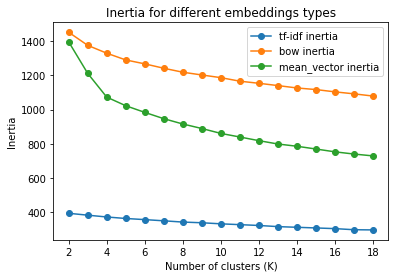

In [ ]:
markers = ['o', 's', 'D']

for index, values in enumerate(scores):
    plt.plot(K, avg_scores[values]["inertia"], label=f"{values} inertia", marker=markers[index])
    
plt.legend()
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Inertia for different embeddings types")
plt.show()

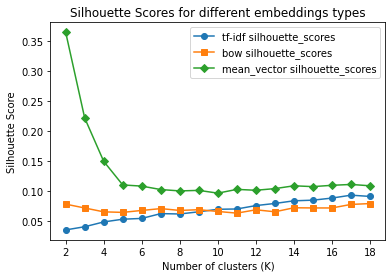

In [9]:

for index, values in enumerate(scores):
    plt.plot(K, avg_scores[values]["silhouette_scores"], label=f"{values} silhouette_scores", marker=markers[index])
    
plt.legend()
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")              
plt.title("Silhouette Scores for different embeddings types")
plt.show()

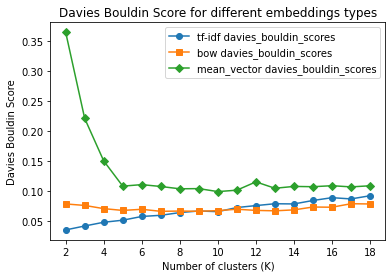

In [7]:
markers = ['o', 's', 'D']

for index, values in enumerate(scores):
    plt.plot(K, avg_scores[values]["davies_bouldin_scores"], label=f"{values} davies_bouldin_scores", marker=markers[index])
    
plt.legend()
plt.xlabel("Number of clusters (K)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Score for different embeddings types")
plt.show()

/home/michael/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


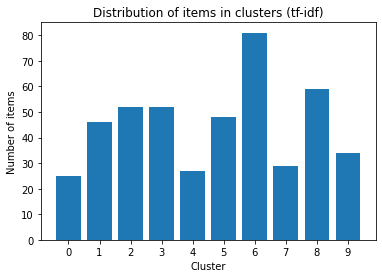

In [15]:
kmeans = KMeans(n_clusters=10, random_state=223).fit(tf_idf)
labels = kmeans.labels_
category_dist = np.unique(labels, return_counts=True)
plt.bar(category_dist[0], category_dist[1])
plt.xlabel("Cluster")
plt.xticks(category_dist[0])
plt.ylabel("Number of items")
plt.title("Distribution of items in clusters (tf-idf)")
plt.show()

/home/michael/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


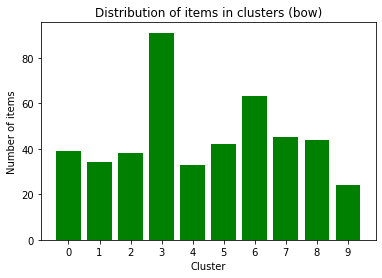

In [16]:
kmeans = KMeans(n_clusters=10, random_state=223).fit(bow)
labels = kmeans.labels_
category_dist = np.unique(labels, return_counts=True)
plt.bar(category_dist[0], category_dist[1], color='green')
plt.xlabel("Cluster")
plt.xticks(category_dist[0])
plt.ylabel("Number of items")
plt.title("Distribution of items in clusters (bow)")
plt.show()

/home/michael/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


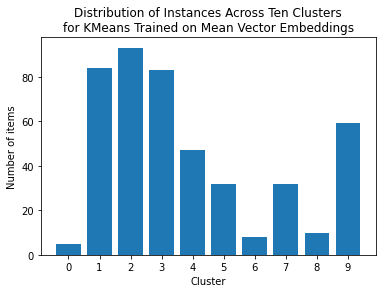

In [3]:
kmeans = KMeans(n_clusters=10, random_state=223).fit(mean_vector)
labels = kmeans.labels_
category_dist = np.unique(labels, return_counts=True)
plt.bar(category_dist[0], category_dist[1])
plt.xlabel("Cluster")
plt.xticks(category_dist[0])
plt.ylabel("Number of items")
plt.title("Distribution of Instances Across Ten Clusters\nfor KMeans Trained on Mean Vector Embeddings")
plt.show()

In [4]:
tsne = TSNE(n_components=2, random_state=150)
tsne_results = tsne.fit_transform(np.array(mean_vector))
x = tsne_results[:, 0]
y = tsne_results[:, 1]

Text(0, 0.5, 't-SNE Component 2')

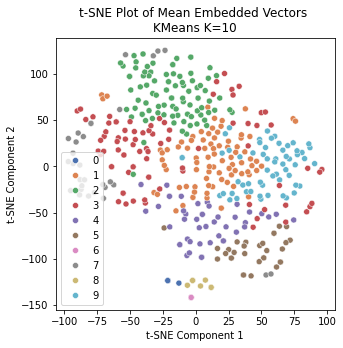

In [5]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x, y=y, hue=kmeans.labels_, palette="deep", legend="full")
plt.title("t-SNE Plot of Mean Embedded Vectors \nKMeans K=10")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

In [7]:
df["KMeans_labels"] = kmeans.labels_
df.to_csv('../../data/description_embeddings.csv', index=False)